Boston Housing Dataset : This dataset was taken from the StatLib library and is maintained by Carneigie Mellon University.
This dataset concerns the housing pricing in the city of Boston.

Below is the picture containing information about the columns.

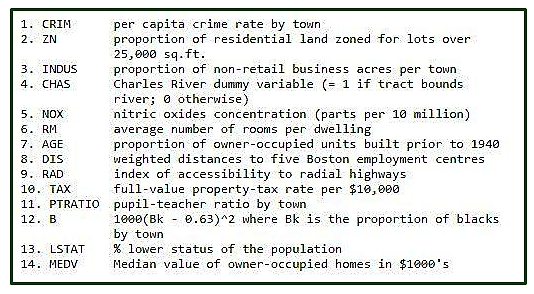

# Importing important Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Reading

In [58]:
#importing Data Set
boston = pd.read_csv("/content/HousingData.csv")
boston = pd.DataFrame(boston)

# EDA1

In [59]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [60]:
boston.shape

(506, 14)

In [61]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

The name of target feature is little off so we'll chane it to more suitable name.

In [62]:
boston['PRICE'] = boston['MEDV']
boston.drop(columns='MEDV',inplace=True)
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [63]:
boston.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


We have few null values so we'll be removing them.

In [64]:
print(boston.shape)
boston.dropna(inplace=True)
print(boston.shape)

(506, 14)
(394, 14)


In [65]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  PRICE    394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


<Axes: >

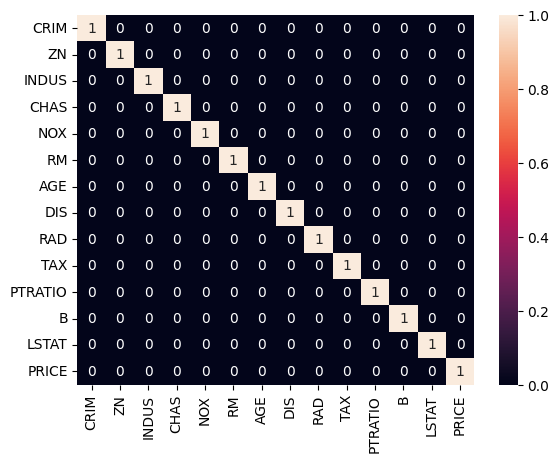

In [67]:
import seaborn as sns
sns.heatmap(boston.corr()>0.9, annot=True)

We can infer from this heatmap that not all the columns are highly correlated so we'll train our model with all the features.


### Feature Extraction

In [68]:
x = boston.iloc[:,:-1]
y = boston.loc[:,['PRICE']]

x.head(),y.head()

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
 5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   
 
         B  LSTAT  
 0  396.90   4.98  
 1  396.90   9.14  
 2  392.83   4.03  
 3  394.63   2.94  
 5  394.12   5.21  ,
    PRICE
 0   24.0
 1   21.6
 2   34.7
 3   33.4
 5   28.7)

Spearating training and testing data.

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

#EDA2

In [70]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

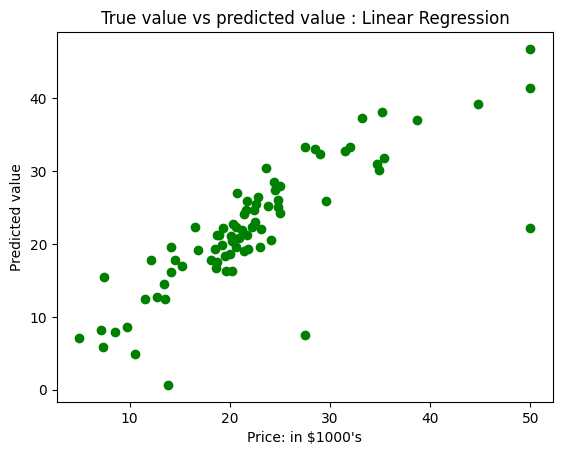

In [81]:
y_pred = LR.predict(x_test)
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

The above graph shows the predicted values and true values scattered across the sapce. As we can see some of the data points are far meaning we might not have that perfect model for prediction.

In [79]:
from sklearn.metrics import mean_squared_error as mse

print('Training Accuracy: ', mse(y_train, LR.predict(x_train)))
print('Testig Accuracy: ', mse(y_test, LR.predict(x_test)))

Training Accuracy:  18.086108155026484
Testig Accuracy:  27.12303980858075


Here we can infer that our model is performing well for training set but not so well for testing set, so the model is pruned to overfitting.

In [78]:
from sklearn.metrics import mean_absolute_error as mae

print('Training Accuracy: ', mae(y_train, LR.predict(x_train)))
print('Testig Accuracy: ', mae(y_test, LR.predict(x_test)))

Training Accuracy:  3.031739885785319
Testig Accuracy:  3.2606545706274037


As we can see the Mean Absolute Error for both testing and training set is quite close we can say the mode is performing ok.

Thanks a lot for going through my work till the end.

Feel free to get in touch if you have any doubts... :)